In [229]:
import os, sys, re, json, time, unittest
import itertools, collections
import re
import operator
from sklearn import datasets, linear_model
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import nltk

In [73]:
#read in data to clean and separate into training and test set
lines = []
for line in open('clean_listings.csv').readlines():
    data = line.split("janson")
    clean_desc = re.sub('[^A-Za-z]', ' ', data[0])
    clean_score = data[1].strip('\n')
    
    lines.append([clean_desc,clean_score])
    
training_set = lines[:len(lines)/2]
test_set = lines[len(lines)/2:]
practice_set = lines[:10]

In [256]:
#separates each review into a dictionary of words and score
temp_dict = []
dictionary = {}
bow = []
for each in training_set:
    sentence = each[0].split(" ")
    bow.append(each[0])
    for word in sentence:
        if word != '':
            temp_dict.append([word.lower(),each[1]])

temp_dict = sorted(temp_dict)

for each in temp_dict:
    if each[0] in dictionary:
        dictionary[each[0]].append(int(each[1]))
    else:
        dictionary[each[0]] = [int(each[1])]
    

keys = dictionary.keys()
total = 0
for each in keys:
    total = sum(dictionary[each])/len(dictionary[each])
    
    dictionary[each] = total
    total = 0
    

In [259]:
#bag of words
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
bag_of_words = vectorizer.fit(bow)
bag_of_words = vectorizer.transform(bow)
print bag_of_words

  (0, 167)	1
  (0, 230)	1
  (0, 280)	1
  (0, 332)	1
  (0, 337)	12
  (0, 461)	2
  (0, 462)	3
  (0, 542)	1
  (0, 619)	2
  (0, 759)	3
  (0, 782)	3
  (0, 826)	1
  (0, 1290)	1
  (0, 1692)	2
  (0, 1756)	1
  (0, 2192)	2
  (0, 2428)	1
  (0, 2584)	2
  (0, 2734)	1
  (0, 2939)	1
  (0, 3012)	1
  (0, 3122)	1
  (0, 3197)	1
  (0, 3242)	1
  (0, 3406)	1
  :	:
  (3512, 826)	2
  (3512, 896)	2
  (3512, 1575)	2
  (3512, 1615)	2
  (3512, 3536)	2
  (3512, 3540)	2
  (3512, 3660)	2
  (3512, 3959)	2
  (3512, 4015)	2
  (3512, 4171)	2
  (3512, 4544)	2
  (3512, 5217)	2
  (3512, 5538)	2
  (3512, 5833)	2
  (3512, 6004)	1
  (3512, 6220)	2
  (3512, 6253)	2
  (3512, 6256)	2
  (3512, 7792)	2
  (3512, 7916)	2
  (3512, 8400)	2
  (3512, 8651)	2
  (3512, 9074)	4
  (3512, 9227)	2
  (3512, 9422)	2


In [235]:
#word_score = [(k, v) for k, v in dictionary.items()] 
regr = linear_model.LinearRegression()
words_train = dictionary.keys()
score_train = dictionary.values()

words_train = np.array(words_train)
score_train = np.array(score_train)

#words_train = words_train.reshape(-1,1)
#score_train = score_train.reshape(-1,1)
#print words_train.shape
#print score_train.shape

#regr.fit(words_train, score_train)

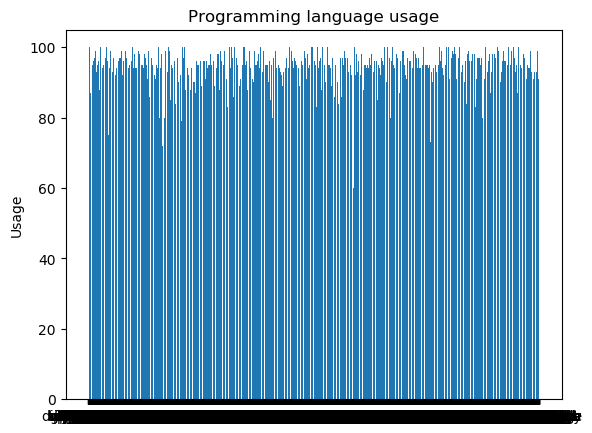

In [238]:

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 

y_pos = np.arange(len(words_train))
performance = score_train
 
plt.bar(y_pos, performance, align='center')
plt.xticks(y_pos, words_train)
plt.ylabel('Usage')
plt.title('Programming language usage')
 
plt.show()